# PREDICTING RED-WINE QUALITY BASED ON CONTENT
                                                              -By Aditi Upadhya  
> ![Image](https://archive.ics.uci.edu/static/public/186/Thumbnails/Large.jpg?153) 
---
This Project covers:

1. Problem Statement
2. Importing Libraries and Dataset.
3. Basic Data Exploration
4. Data Visualisation
5. Feature Engineering.
6. Train-Test split
7. Linear Regression, Ridge and Lasso Regression, Logistic Regression, SVM(SVC=> Poly/RBF), KNN (Classification), Naive Bayes, Descision Tree(Classification) and Random Forest using SKLEARN
8. Model Evaluvation and Conclusion.



Assignment : 
1. You need to download 'any' dataset from *"UCI Repository"*. [**Link**](https://archive.ics.uci.edu/datasets) 
2. Then, upload the dataset and need to perform all ML supervised algorithms with hyper-parameter tuning using *"Google Collab"* or *"Jupyter Notebook"*.
   * Linear Regression
   * Ridge and Lasso Regression
   * Logistic Regression
   * SVM(SVC/SVR, Poly/RBF)
   * KNN (Regression and Classification)
   * Naive Bayes
   * Descision Tree(Regression and Classification)
   * Random Forest
4. Find the best model out of all.
5. Then, create `.pkl` file with the best model
6. pass inputs /check outputs for both single-input>>single-output and batch-input>>batch-output.
7. Then, need to create this file in `.py` extension using *'VS-code'*.(all three files(`.py`,`.pkl`,`.csv`)).

## PROBLEM STATEMENT

* The dataset is related to *'red vinho verde wine samples'*, from the north of Portugal.
* The dataset contains 12 coloumns(11-Input variables (based on physicochemical tests) and 1 Output variable (based on sensory data))
1. **Fixed acidity** :  (g(tartaric acid)/dm^3)
2. **Volatile acidity** : (g(acetic acid)/dm^3)
3. **Citric acid** :  (g/dm^3)
4. **Residual sugar** : (g/dm^3)
5. **Chlorides** : (g(Sodium cloride)/dm^3)
6. **free sulfur dioxide** : (mg/dm^3)
7. **Total Sulfur dioxide** : (mg/dm^3)
8. **Density** : (g/m^3)
9. **pH** : logarithmic scale measuring acidity(pH < 7) or alkalinity(pH > 7) of a solution
10. **Sulphates** : (g(potassium sulphate/dm^3)
11. **Alcohol** : (vol.%)
12. **Quality** : score (between 0[very bad] and 10[very good])

* Number of Instances: red wine - 1599
* Number of Attributes: 11 + output attribute

  

Dataset source: [Link](https://archive.ics.uci.edu/dataset/186/wine+quality)

**Objective**: The goal is to model wine quality based on physicochemical tests.

## IMPORTING LIBRARIES AND DATASET

In [916]:
import numpy as np                                                                                              #numpy:"numeric" data that needs analysis/calculation
import pandas as pd                                                                                             #pandas:"dataset" manipulation/analysis/visualisation
import matplotlib.pyplot as plt                                                                                 #matplotlib:'representation' of dataset in graphs and charts
import seaborn as sns                                                                                           #seaborn: dataset iteration/classification and adding colors to grahps and charts

from sklearn.preprocessing import StandardScaler                                                                #StandardScaler: standardisation of dataset (scaling the dataset)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression                                                               
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle                                                                                                        #need to create .pkl file

import warnings                            
warnings.filterwarnings('ignore')                                                                                     ##ignore all warnings globally

> Basic Data Exploration

In [919]:
df = pd.read_csv('Desktop/ADITI/Projects+materials+class/Projects/assignment/winequality-red.csv')

In [921]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

>Checking basic information

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


>Inference:

1. no null values
2. 11 input coloumns with float type data and output coloumn as integer type data. 
3. Number of Instances: 1599
4. Number of Attributes: 11 + output attribute
5. Datatype: 10 float type of data (input) + 1 int type of data (output)

>Checking missing values
(as per dataset 'Missing Attribute Values: None')

In [928]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> Inference: No missing values

>Checking statistical summary of the data

In [932]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

> Inference :

Physicochemical laboratory tests characterize vine based on density, alcohol or pH values, while sensory tests rely mainly on human experts.
Found some useful statistical information :
1. max alcohol content is 14.9%.
2. mean of vine density falls around 0.9967 g/m^3.(also the max density is seen 1g/m^3, however the mean is affected by the outliers, and need more information to make accurate decisions)  
3. most acidic vine shows on pH scale as 2.7

The quarties details are given in the form of 25%, 50% and 75%. The data divided into 3 equal parts or 4 equal parts.So, 25% values lie in each group standard deviation.


In [935]:
df.shape

(1599, 12)

>Inference : Found that the dataset has 1599 rows and 12 coloumns

>Checking unique values for each feature

In [939]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

>Numerical Feature in the dataset

In [942]:
df.select_dtypes(include = [np.number]).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

>Inference : All coloumns are found to have numeric feature coloumns

## DATA VISUALISATION

> *Checking the count of target variable*

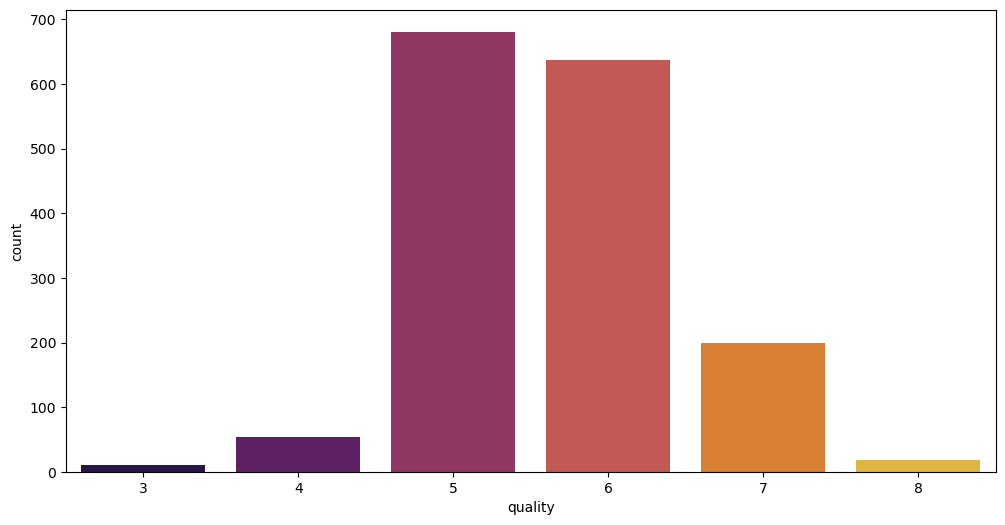

In [947]:
plt.figure(figsize =(12,6))
sns.countplot(x = 'quality', data =df, palette = 'inferno')   ##palette:for color gradients(viridis/plasma/magma/cividis/inferno)
plt.show()

> Inference : Quality =5 is the highest in count

 * This also shows imbalance in the dataset.

>Checking alcohol content in the vine

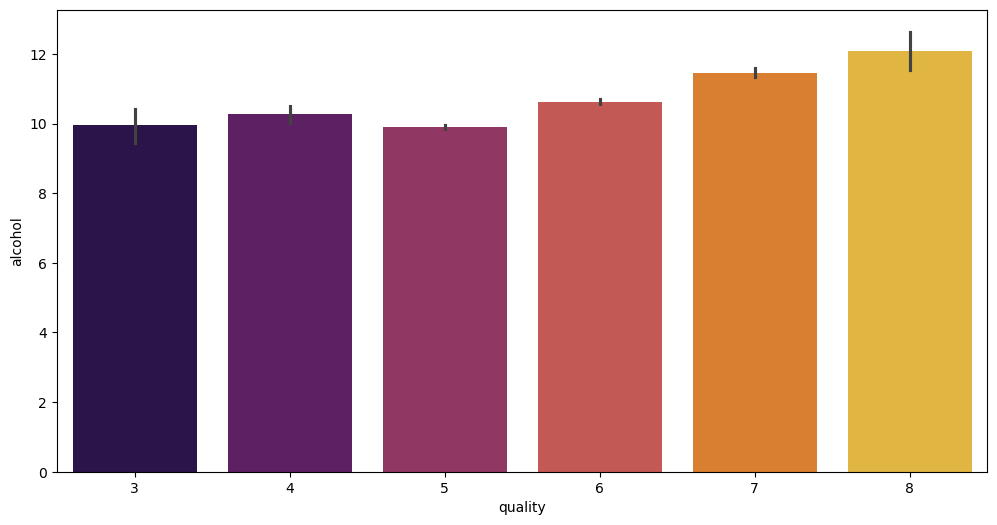

In [951]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')       ##palette:for color gradients(viridis/plasma/magma/cividis/inferno)
plt.show()

>Inference : Quality = 8 has the highest alcohol content

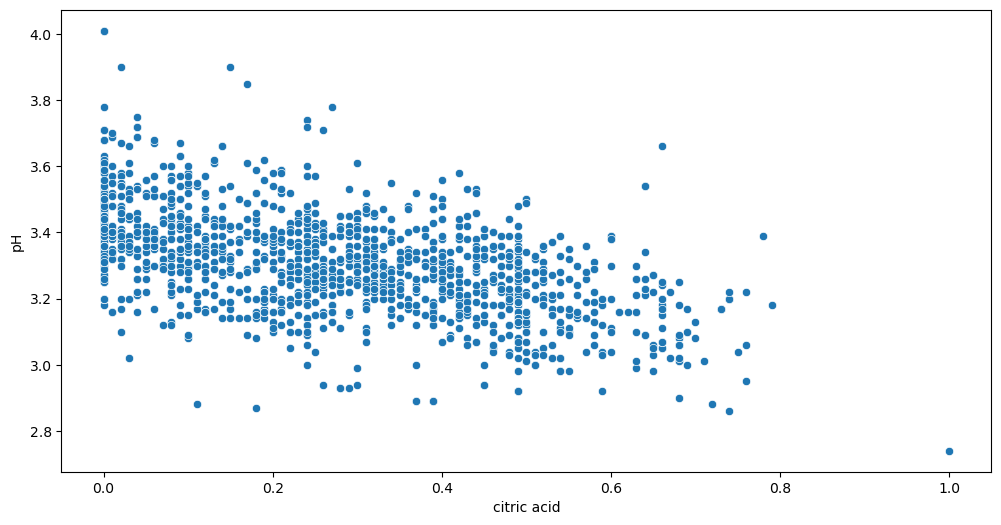

In [954]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

>To visualise the relationship between features in complete dataset using pairplot

<Figure size 1200x600 with 0 Axes>

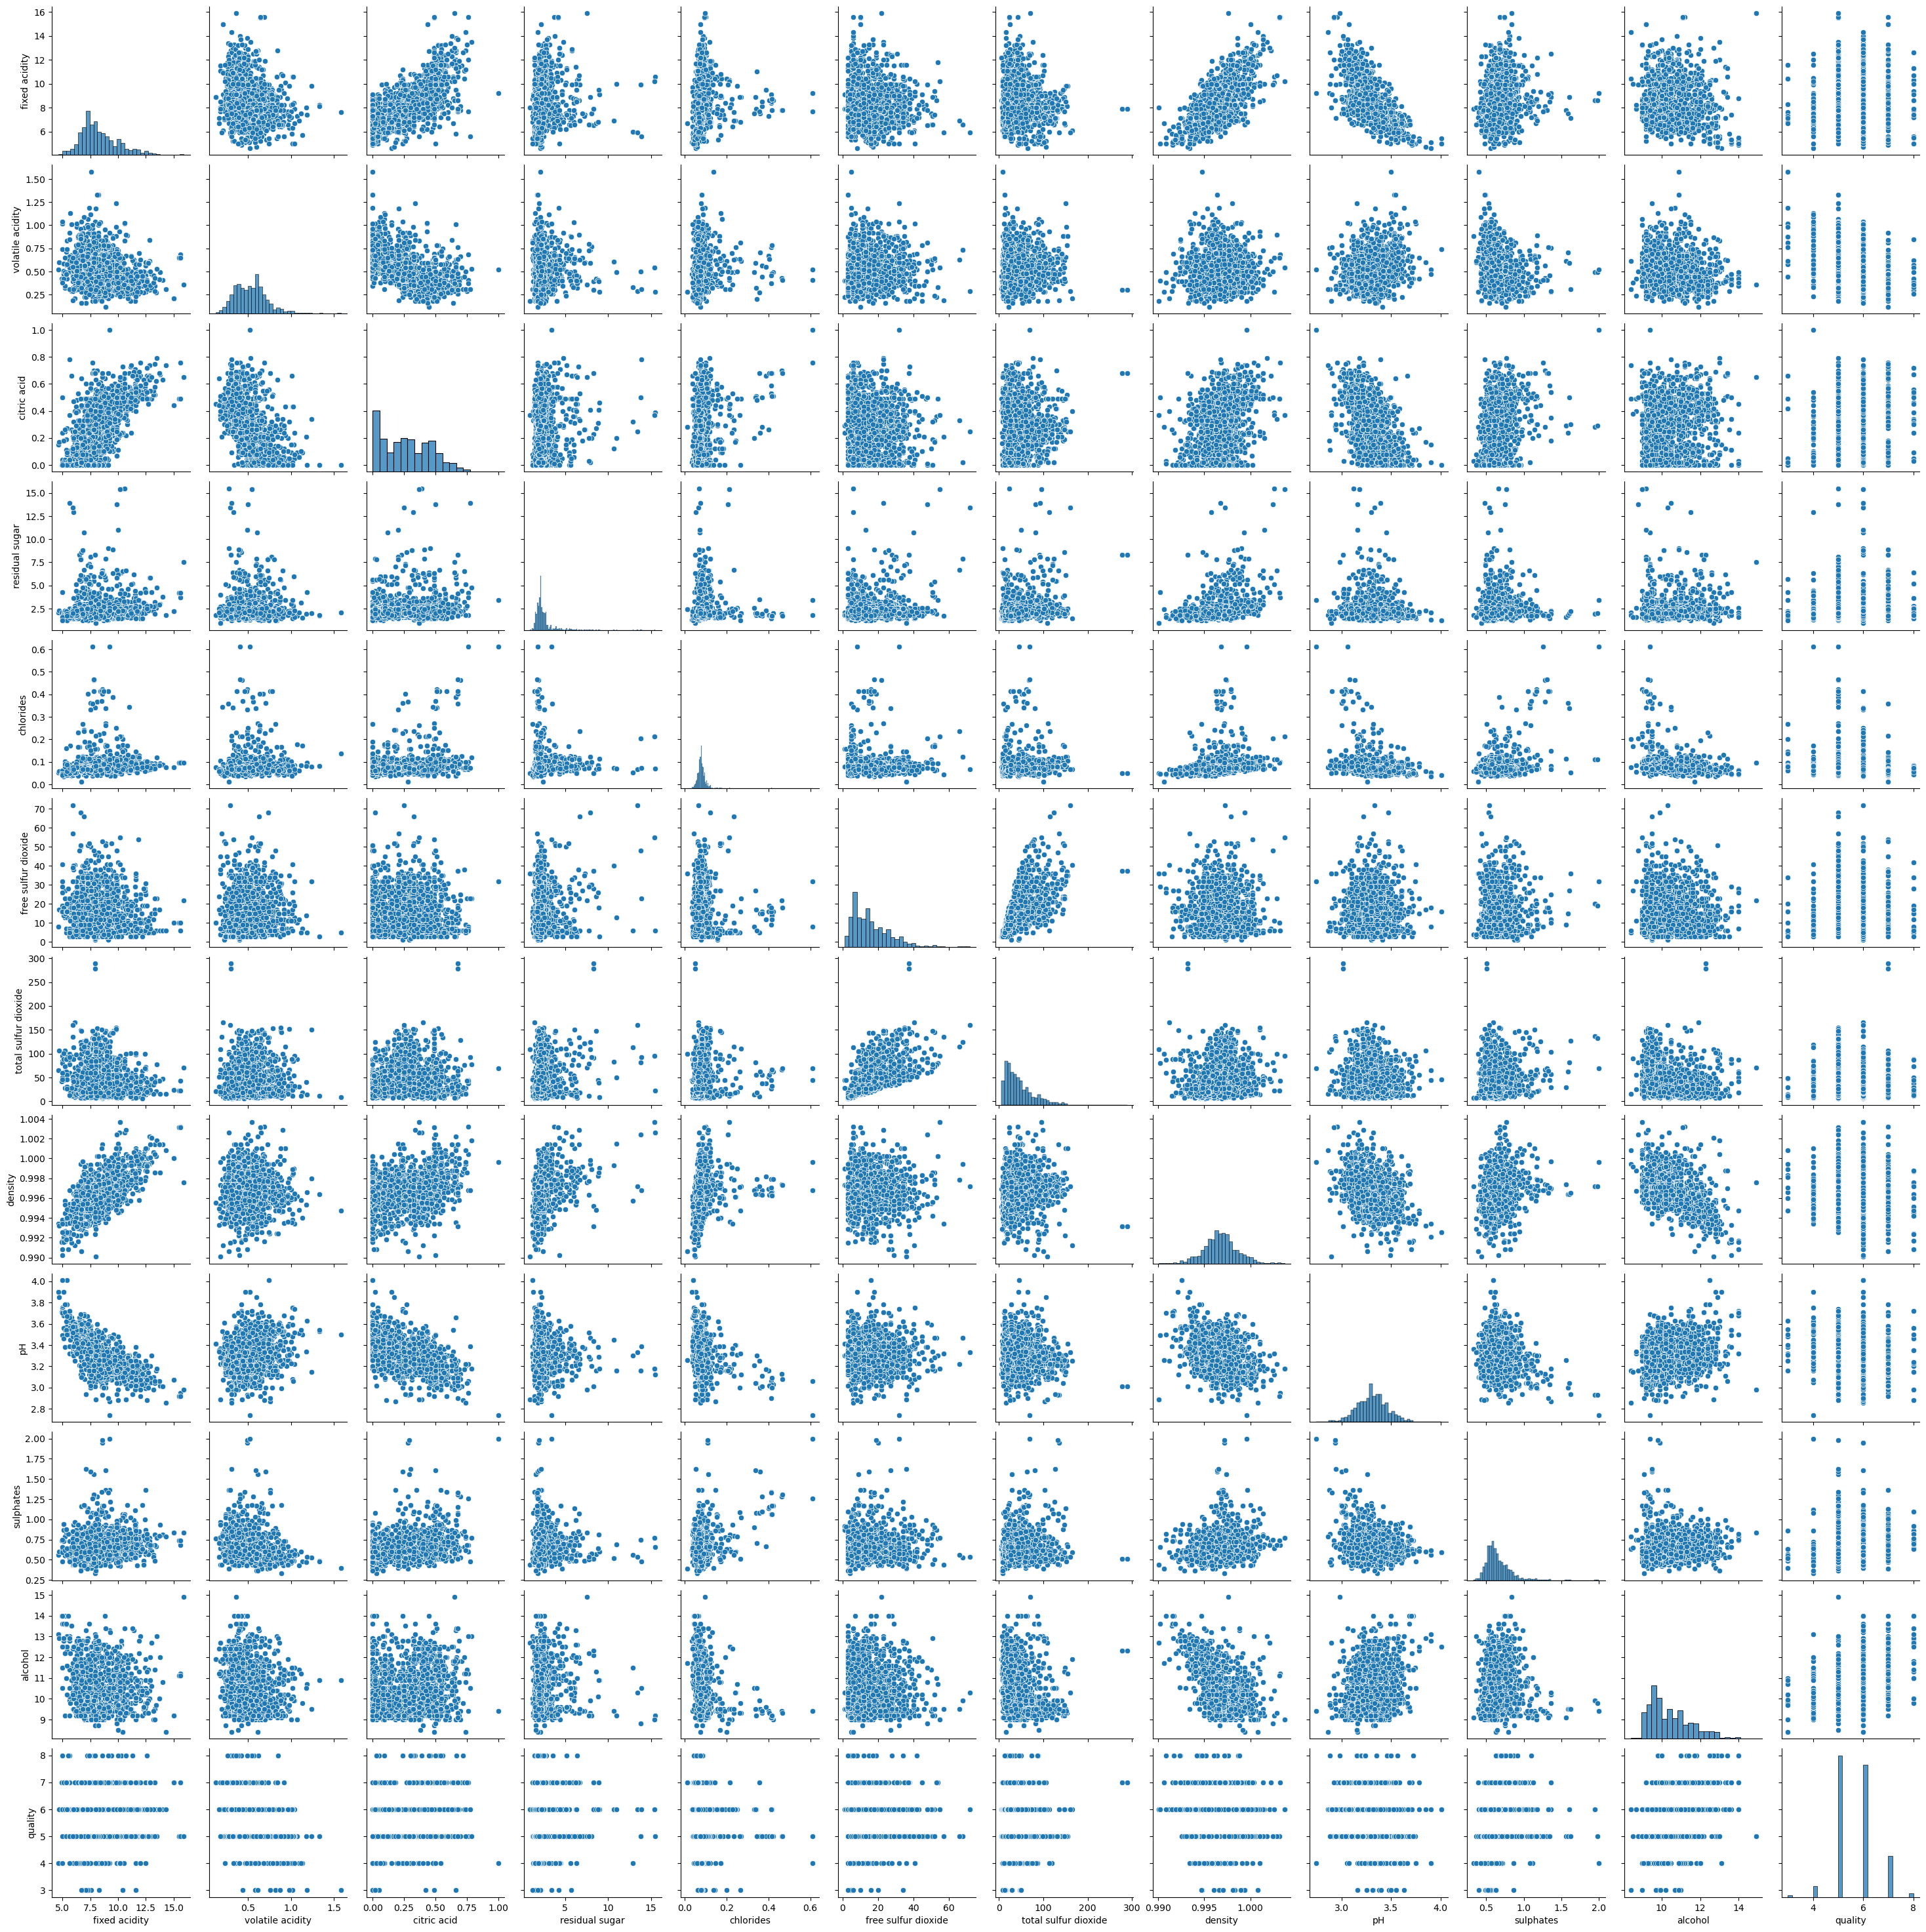

In [957]:
plt.figure(figsize = (12,6))
sns.pairplot(df)      ##using "pairplot" from seaborn library to visualise relationship between features
plt.show()

>Inference



>To visualize correlation between features using heatmap

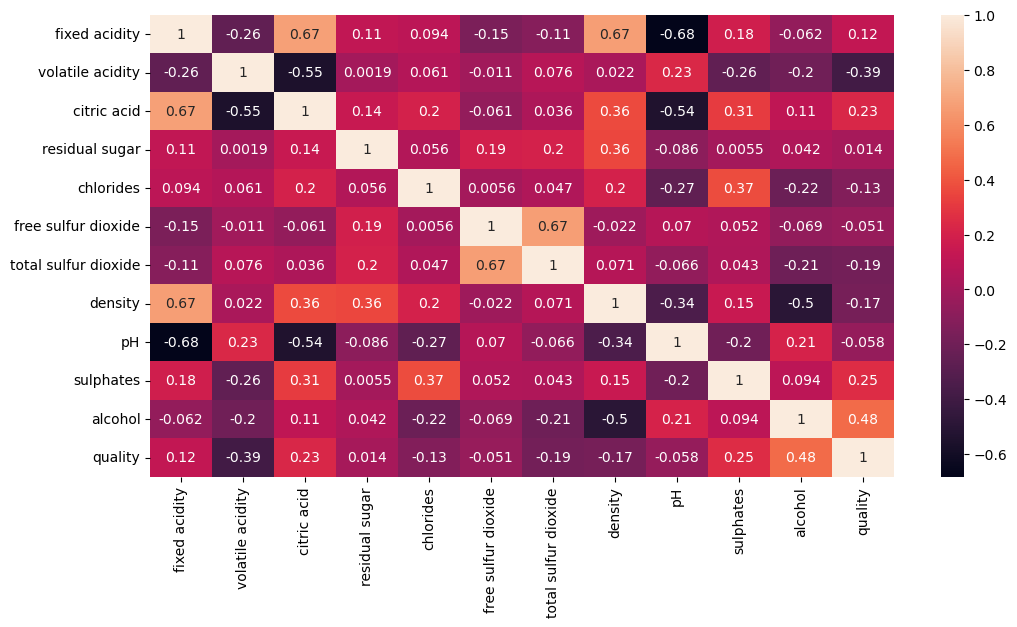

In [960]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot= True)   ##setting annot=True to know the relationship 'value'
plt.show()

>Inference :

1. Checked for heatmap for 1.00 as high positively correlated and -0.6 as negetively correlated.
2. Found that, for quality the 'alcohol' and 'sulphates' have the best correlation with quality.(0.48 and 0.25).
3. Found that, higher the 'alcohol' and 'sulphates' content, the vine quality is likely to be marked as good vine. 

>checking the shape of the data

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

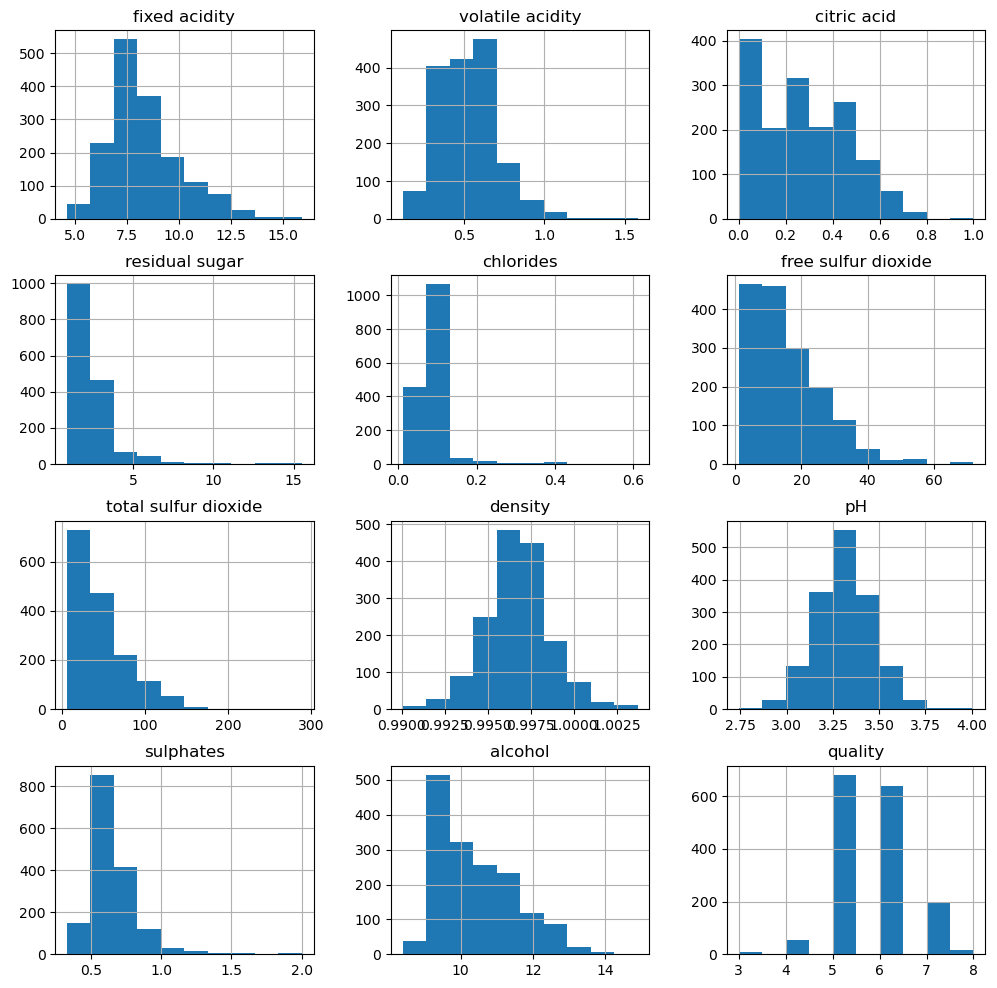

In [963]:
df.hist(figsize=(12,12),layout=(4,3))

>Inference

* The wide graphs, like, 'volatile acidity' shows the variation in the values
* if the dataset in the graph shows peaks in the graphs show the im-balance in the values in the dataset.

## Feature Engineering

In [966]:
##oversampling is needed, as the count is high for quality = 5 and 6, and less for quality = 7 and 4 whereas least for quality =3 and 8


In [967]:
X = df.iloc[:, :-1]
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [968]:
y = df.iloc[:, -1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [969]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [970]:
df['quality'] = df['quality'].map({3:0,4:0,5:0,6:0,7:0, 8:1})
df['quality'].unique()

array([0, 1], dtype=int64)

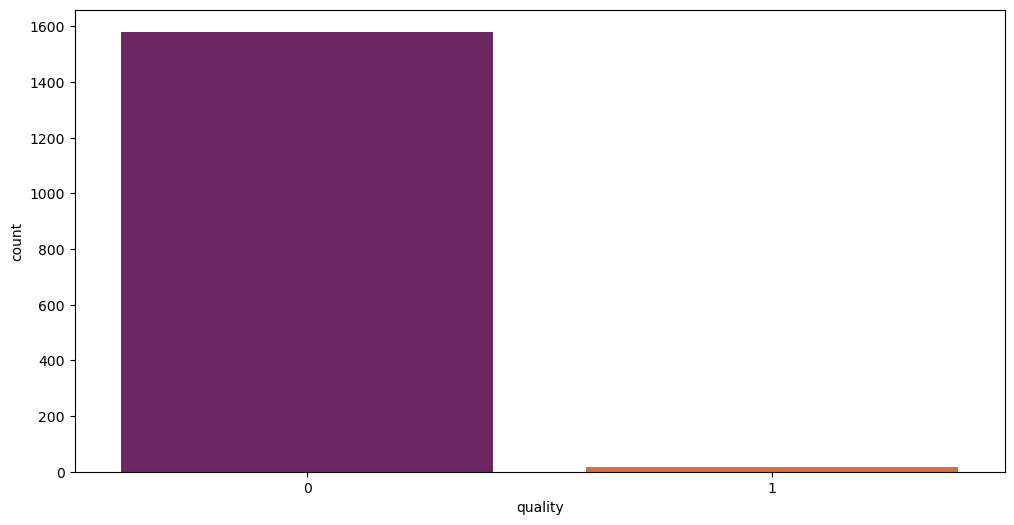

In [971]:
plt.figure(figsize =(12,6))
sns.countplot(x = 'quality', data =df, palette = 'inferno')   ##palette:for color gradients(viridis/plasma/magma/cividis/inferno)
plt.show()

## Train-Test split

>Splitting the dataset into train and test as 60% and 30%

In [974]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) ##taking 42 random values in train and test

In [975]:
scaler = StandardScaler()

In [976]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

### Linear Regression

In [978]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [979]:
MSE = cross_val_score(linear_reg, X, y, scoring="neg_mean_squared_error",cv=5)
MSE

array([-0.44538803, -0.45217851, -0.44438074, -0.40926102, -0.43193864])

>Evaluvation

In [981]:
mean_MSE = np.mean(MSE)
mean_MSE

-0.4366293880315405

### Ridge Regression

In [983]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error", cv=5 )
ridge_regression.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [984]:
ridge_regression.best_params_

{'alpha': 0.01}

>Evaluvation

In [986]:
ridge_reg_score = ridge_regression.best_score_
ridge_reg_score

-0.43587457785367745

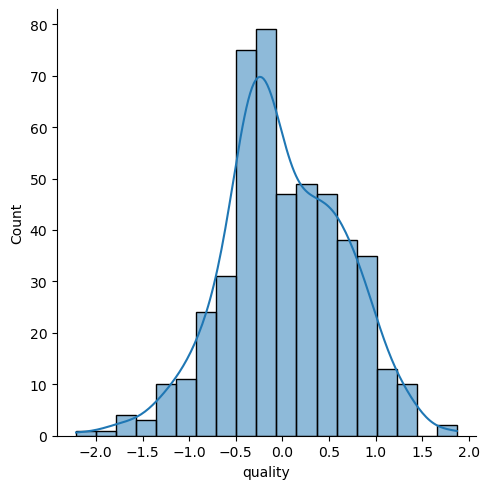

In [987]:
ridge_prediction = ridge_regression.predict(X_test)
sns.displot(y_test - ridge_prediction, kde=True) ##kde=smoothens the graph

>Infernece:

The graph shows errors are centered to zero, model is not bias.

### Lasso Regression

In [990]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5 )
lasso_regression.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [991]:
lasso_regression.best_params_

{'alpha': 1e-08}

>Evaluvation

In [993]:
lasso_regression_score = lasso_regression.best_score_
lasso_regression_score

-0.43662911950553907

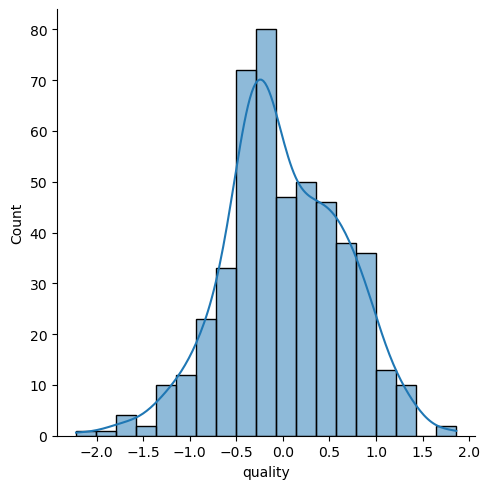

In [994]:
lasso_prediction = lasso_regression.predict(X_test)

sns.displot(y_test - lasso_prediction, kde=True)

>Infernece:

The graph shows errors are centered to zero, model is not bias.

### Logistic Regression

In [997]:
log_reg_model = LogisticRegression()
log_reg_model

LogisticRegression()

In [998]:
parameters = {'C':[0.5, 1,2,3,4,5,6,7,8,9,10,20,30,40,50], 'penalty':['l1','l2','elasticnet']}

logistic_reg = GridSearchCV(log_reg_model, parameters, scoring='accuracy', cv=5)

In [999]:
logistic_reg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                               50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [1000]:
logistic_reg.best_params_

{'C': 5, 'penalty': 'l2'}

In [1001]:
logistic_regression_score = logistic_reg.best_score_
logistic_regression_score

0.5816222570532915

In [1002]:
logistic_prediction = logistic_reg.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_prediction)
logistic_regression_confusion_matrix

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  12,   5,   0,   0],
       [  0,   0, 145,  50,   0,   0],
       [  0,   0,  75, 124,   1,   0],
       [  0,   0,   4,  57,   0,   0],
       [  0,   0,   0,   6,   0,   0]], dtype=int64)

In [1003]:
logistic_regression_accuracy_score = accuracy_score(y_test, logistic_prediction)
logistic_regression_accuracy_score

0.5604166666666667

>Training Logistics Regression Model

In [1005]:
logistic_model = LogisticRegression(multi_class = 'ovr', max_iter=200)
logistic_model

LogisticRegression(max_iter=200, multi_class='ovr')

In [1006]:
logistic_model.fit(X_train_std, y_train.values.ravel())

LogisticRegression(max_iter=200, multi_class='ovr')

>Evaluvation

In [1008]:
logistic_pred2 = logistic_model.predict(X_test_std)
Logistic_accuracy_score2 = accuracy_score(y_test, logistic_pred2)
Logistic_accuracy_score2

0.56875

In [1009]:
logistic_classification_report2 = classification_report(y_test, logistic_pred2)
logistic_classification_report2

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        17\n           5       0.60      0.79      0.68       195\n           6       0.54      0.56      0.55       200\n           7       0.47      0.13      0.21        61\n           8       0.00      0.00      0.00         6\n\n    accuracy                           0.57       480\n   macro avg       0.27      0.25      0.24       480\nweighted avg       0.53      0.57      0.53       480\n'

In [1010]:
logistic_confusion_matrix2 = confusion_matrix(y_test, logistic_pred2)
logistic_confusion_matrix2

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  13,   4,   0,   0],
       [  0,   0, 154,  41,   0,   0],
       [  0,   0,  84, 111,   5,   0],
       [  0,   0,   4,  49,   8,   0],
       [  0,   0,   0,   2,   4,   0]], dtype=int64)

>confusion matrix in heatmap format for visualisation

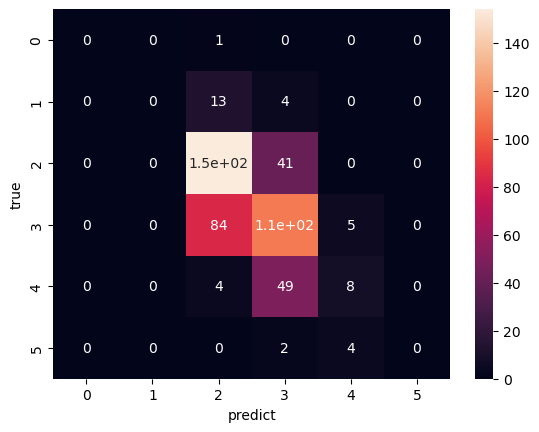

In [1012]:
cml_logistic_confusion_matrix2=confusion_matrix(y_test, logistic_pred2)
axl=sns.heatmap(cml_logistic_confusion_matrix2, annot=True)
axl.set(xlabel='predict', ylabel='true')
plt.show()

### KNN Classification

In [1014]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_std, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [1015]:
knn_pred = knn_model.predict(X_test_std)

>Model Evaluvation

In [1017]:
knn_classification_confusion_matrix = confusion_matrix(y_test, knn_pred)
knn_classification_confusion_matrix

array([[  0,   0,   0,   1,   0,   0],
       [  0,   2,   6,   9,   0,   0],
       [  2,   3, 128,  58,   4,   0],
       [  0,   7,  65, 105,  23,   0],
       [  0,   0,  10,  25,  26,   0],
       [  0,   0,   1,   2,   3,   0]], dtype=int64)

>confusion matrix in heatmap format for visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

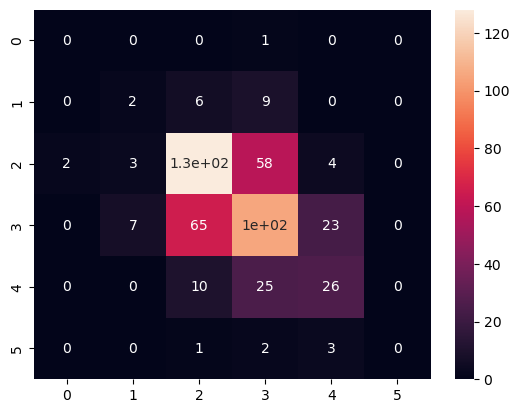

In [1019]:
cml_knn_classification_confusion_matrix=confusion_matrix(y_test, knn_pred)
axl_knn_classification_confusion_matrix=sns.heatmap(cml_knn_classification_confusion_matrix, annot=True)
axl.set(xlabel='predict', ylabel='true')
plt.show

In [1020]:
knn_classification_report = classification_report(y_test, knn_pred)
knn_accuracy_score = cross_val_score(knn_model, df, df['quality'], cv=10)
knn_accuracy_score

array([0.99375   , 0.9875    , 0.98125   , 0.9875    , 0.9875    ,
       0.9875    , 0.9875    , 0.9875    , 0.9875    , 0.99371069])

In [1021]:
knn_classification_accuracy_score_mean = knn_accuracy_score.mean()
knn_classification_accuracy_score_mean

0.9881210691823901

>Evaluvating dataset in KNN classification model for all N (1-8) values

In [1023]:
accuracy_value = []

for val in range(1,9):
  knn = KNeighborsClassifier(n_neighbors=val)
  score = cross_val_score(knn, df, df['quality'], cv=10)
  accuracy_value.append(score.mean())

accuracy_value

[0.9843671383647798,
 0.98874606918239,
 0.9881210691823901,
 0.98874606918239,
 0.9881210691823901,
 0.98874606918239,
 0.98874606918239,
 0.98874606918239]

In [1024]:

knn_classification_all_N_values_accuracy_score_mean = score.mean()
knn_classification_all_N_values_accuracy_score_mean

0.98874606918239

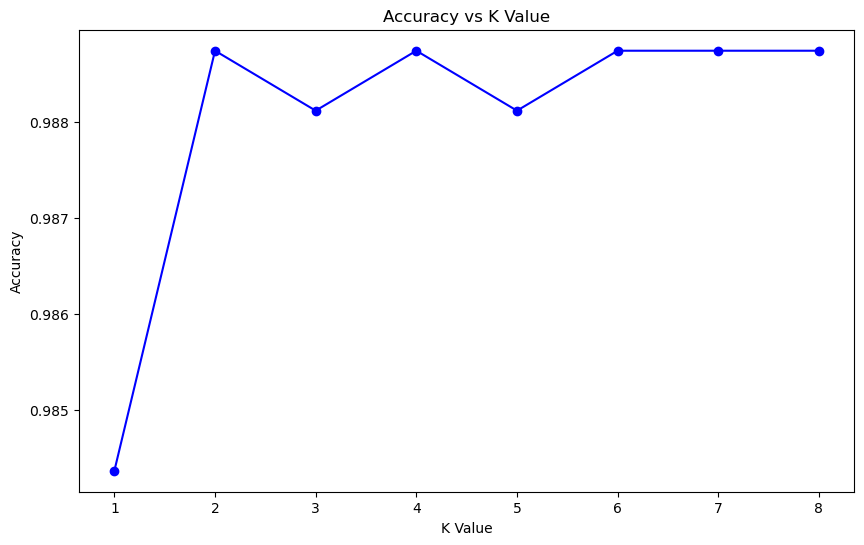

In [1025]:
#accuracy_values = []
#accuracy_values = accuracy_values.append.(score)

plt.figure(figsize=(10,6))
plt.plot(range(1,9), accuracy_value, color="blue",marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

>Inference

* The graph shows that, this is likely to be a good model for this type of dataset, as the K values are increasing, the accuracy is increasing.
* And for accurate determination, the model requires oversampling of the data to balance the dataset, as the count of quality=5 and 6 are more compared to quality=3,4,7,8.
                                                                                                      

### Descision Tree Classification

In [1028]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

>Evaluvating

In [1030]:
dt_pred = dt_model.predict(X_test_std)
dt_accuracy_score = accuracy_score(y_test, dt_pred)
dt_accuracy_score

0.5166666666666667

[Text(0.5, 0.875, 'x[10] <= 0.102\ngini = 0.642\nsamples = 1119\nvalue = [9, 36, 486, 438, 138, 12]'),
 Text(0.25, 0.625, 'x[6] <= 1.561\ngini = 0.537\nsamples = 692\nvalue = [6.0, 25.0, 415.0, 219.0, 25.0, 2.0]'),
 Text(0.125, 0.375, 'x[9] <= -0.487\ngini = 0.567\nsamples = 602\nvalue = [6, 24, 331, 215, 24, 2]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 234\nvalue = [4, 18, 156, 52, 4, 0]'),
 Text(0.1875, 0.125, 'gini = 0.574\nsamples = 368\nvalue = [2, 6, 175, 163, 20, 2]'),
 Text(0.375, 0.375, 'x[3] <= -0.664\ngini = 0.127\nsamples = 90\nvalue = [0, 1, 84, 4, 1, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.107\nsamples = 89\nvalue = [0, 0, 84, 4, 1, 0]'),
 Text(0.75, 0.625, 'x[10] <= 1.069\ngini = 0.638\nsamples = 427\nvalue = [3, 11, 71, 219, 113, 10]'),
 Text(0.625, 0.375, 'x[9] <= -0.429\ngini = 0.608\nsamples = 259\nvalue = [3, 9, 60, 145, 40, 2]'),
 Text(0.5625, 0.125, 'gini = 0.667\nsamples = 64\nvalue = 

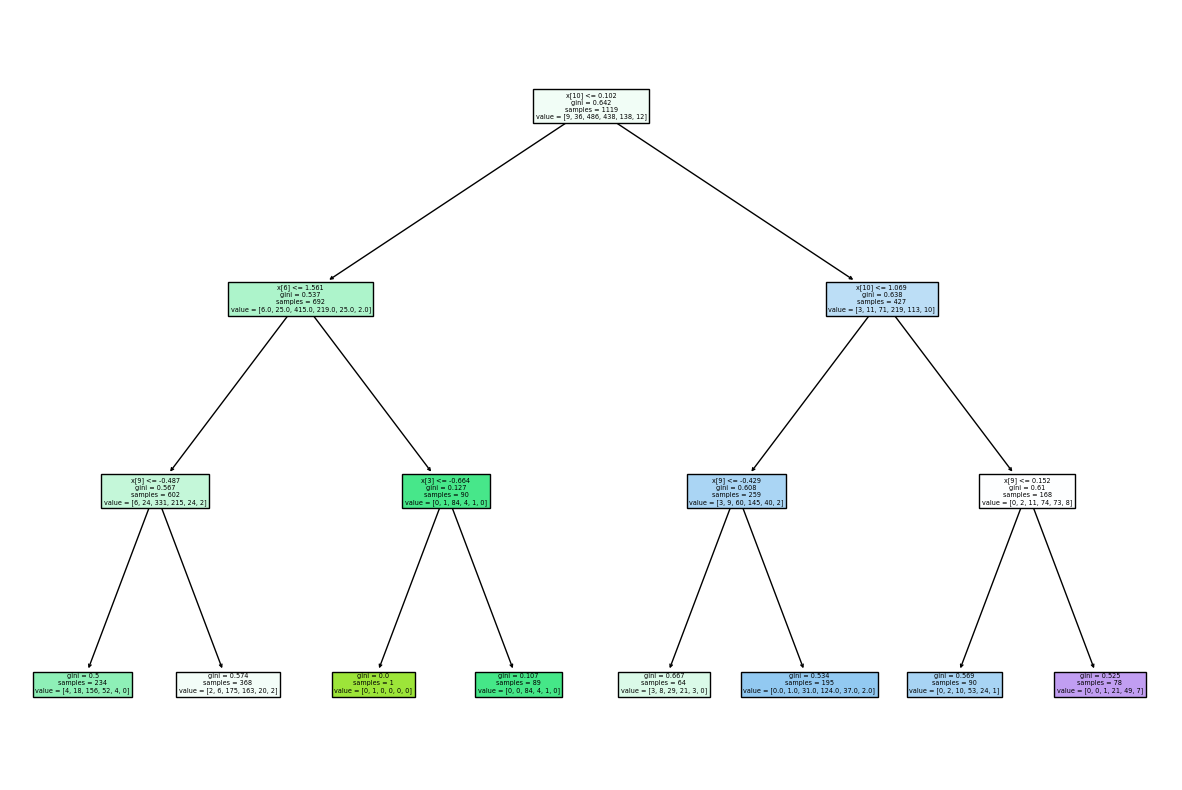

In [1177]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True)

<function matplotlib.pyplot.show(close=None, block=None)>

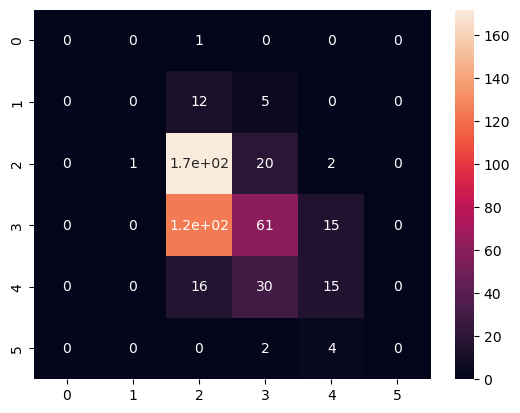

In [1185]:
cml_dt_confusion_matrix =confusion_matrix(y_test, dt_pred)
axl_dt_confusion_matrix=sns.heatmap(cml_dt_confusion_matrix, annot=True)
axl.set(xlabel='predict', ylabel='true')
plt.show

### SVM

>SVC kernal = rbf, poly

In [1033]:
SVC_classifier_rbf = SVC(kernel='rbf')
SVC_classifier_rbf

SVC()

In [1034]:
SVC_classifier_rbf.fit(X_train_std, y_train)

SVC()

In [1035]:
SVC_rbf_y_pred = SVC_classifier_rbf.predict(X_test_std)
SVC_classifier_rbf_accuracy_score = accuracy_score(y_test, SVC_rbf_y_pred)
SVC_classifier_rbf_accuracy_score

0.5979166666666667

In [1037]:
SVC_rbf_classification_report = classification_report(y_test, SVC_rbf_y_pred)
SVC_rbf_classification_report

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        17\n           5       0.63      0.79      0.70       195\n           6       0.57      0.59      0.58       200\n           7       0.58      0.25      0.34        61\n           8       0.00      0.00      0.00         6\n\n    accuracy                           0.60       480\n   macro avg       0.30      0.27      0.27       480\nweighted avg       0.56      0.60      0.57       480\n'

<function matplotlib.pyplot.show(close=None, block=None)>

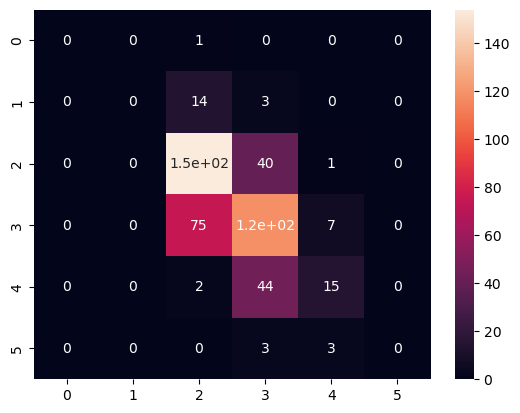

In [1038]:
cml_SVC_rbf_confusion_matrix =confusion_matrix(y_test, SVC_rbf_y_pred)
axl_SVC_rbf_confusion_matrix=sns.heatmap(cml_SVC_rbf_confusion_matrix, annot=True)
axl.set(xlabel='predict', ylabel='true')
plt.show

In [1040]:
SVC_classifier_poly = SVC(kernel='poly')
SVC_classifier_poly

SVC(kernel='poly')

In [1041]:
SVC_classifier_poly.fit(X_train_std, y_train)

SVC(kernel='poly')

In [1042]:
SVC_poly_y_pred = SVC_classifier_poly.predict(X_test_std)
SVC_classifier_poly_accuracy_score = accuracy_score(y_test, SVC_poly_y_pred)
SVC_classifier_poly_accuracy_score

0.5541666666666667

In [1043]:
SVC_poly_classification_report = classification_report(y_test, SVC_poly_y_pred)
SVC_poly_classification_report

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        17\n           5       0.58      0.79      0.67       195\n           6       0.53      0.47      0.50       200\n           7       0.52      0.28      0.36        61\n           8       0.00      0.00      0.00         6\n\n    accuracy                           0.55       480\n   macro avg       0.27      0.26      0.26       480\nweighted avg       0.52      0.55      0.53       480\n'

In [1050]:
SVC_poly_confusion_matrix = confusion_matrix(y_test, SVC_poly_y_pred)
SVC_poly_confusion_matrix

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  15,   2,   0,   0],
       [  1,   0, 154,  39,   1,   0],
       [  0,   0,  93,  95,  12,   0],
       [  0,   0,   4,  39,  17,   1],
       [  0,   0,   0,   3,   3,   0]], dtype=int64)

>confusion matrix in heatmap format for visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

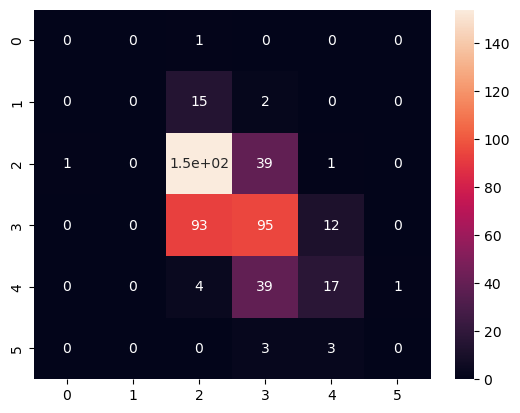

In [1061]:
cml_SVC_poly_confusion_matrix =confusion_matrix(y_test, SVC_poly_y_pred)
axl_SVC_poly_confusion_matrix=sns.heatmap(cml_SVC_poly_confusion_matrix, annot=True)
axl.set(xlabel='predict', ylabel='true')
plt.show

>SVR kernal = rbf, poly

In [1065]:
SVM_regression = SVR(kernel ='rbf')
SVM_regression

SVR()

In [1069]:
SVM_regression.fit(X_train_std,y_train)

SVR()

In [1073]:
y_pred_SVR = SVM_regression.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  2,   1,   9,   5,   0,   0],
       [  0,   6, 128,  56,   5,   0],
       [  0,  11,  52, 100,  35,   2],
       [  0,   0,   3,  29,  29,   0],
       [  0,   0,   0,   1,   5,   0]], dtype=int64)

### Random Forest

In [1075]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [1076]:
rf_model.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

In [1077]:
y_pred = rf_model.predict(X_test_std)
rf_accuracy_score = accuracy_score(y_test, y_pred)
rf_accuracy_score

0.6458333333333334

> Checked the [0] estimator(single desicion tree)

[Text(0.29006071805702216, 0.975, 'x[9] <= -0.719\ngini = 0.634\nsamples = 714\nvalue = [6, 31, 504, 429, 137, 12]'),
 Text(0.05312829989440338, 0.925, 'x[7] <= -1.951\ngini = 0.439\nsamples = 143\nvalue = [3, 18, 164, 34, 6, 0]'),
 Text(0.030623020063357972, 0.875, 'x[1] <= -1.034\ngini = 0.48\nsamples = 8\nvalue = [0, 0, 0, 6, 4, 0]'),
 Text(0.026399155227032733, 0.825, 'x[3] <= -0.629\ngini = 0.32\nsamples = 4\nvalue = [0, 0, 0, 1, 4, 0]'),
 Text(0.022175290390707498, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.030623020063357972, 0.775, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 4, 0]'),
 Text(0.03484688489968321, 0.825, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.07563357972544879, 0.875, 'x[1] <= -1.089\ngini = 0.394\nsamples = 135\nvalue = [3, 18, 164, 28, 2, 0]'),
 Text(0.04329461457233368, 0.825, 'x[9] <= -0.922\ngini = 0.562\nsamples = 5\nvalue = [0, 4, 1, 6, 0, 0]'),
 Text(0.03907074973600845, 0.775, 'x[3] <= -0.419\ngini = 

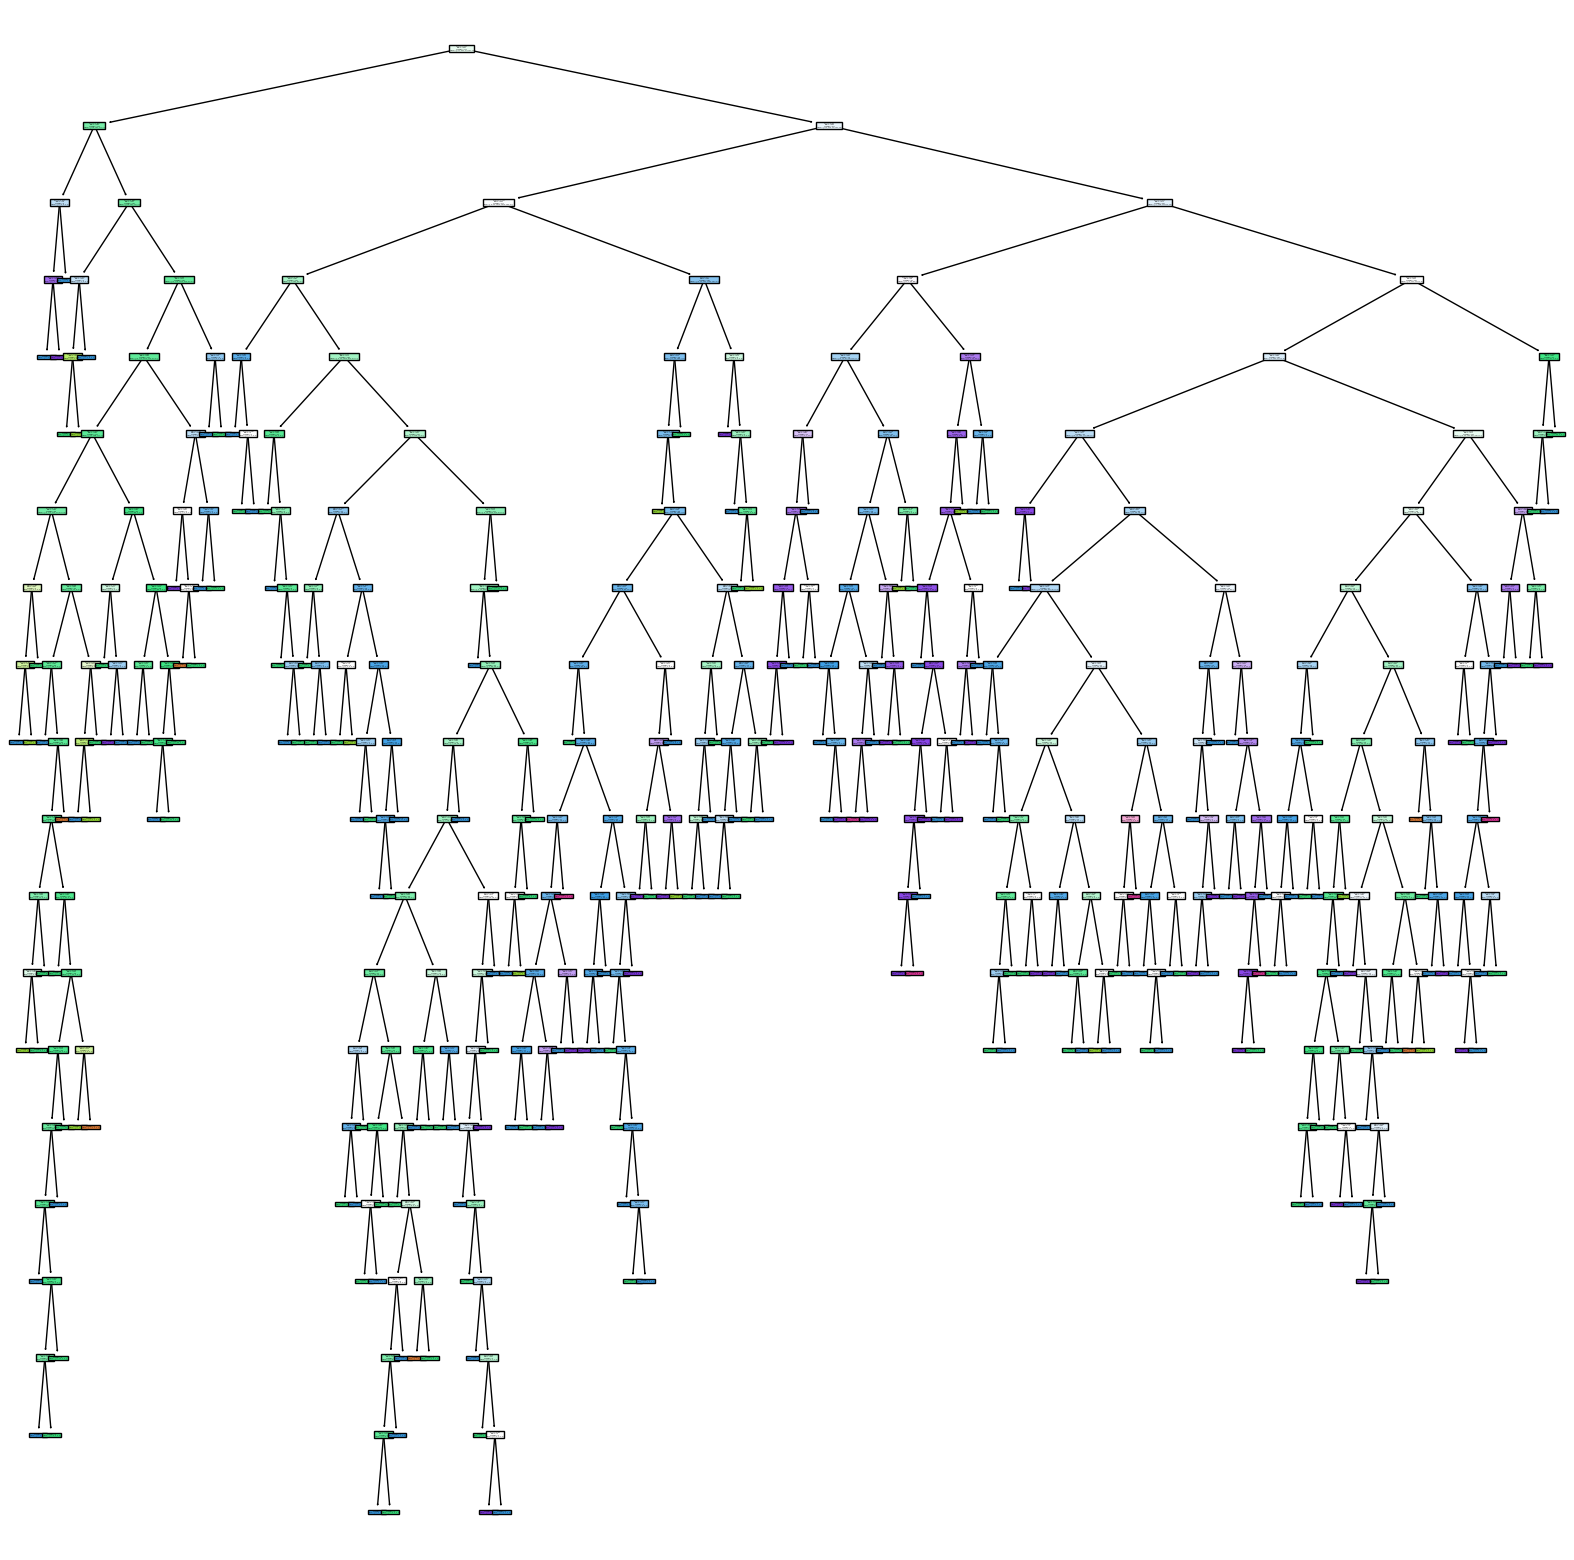

In [1079]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_model.estimators_[0], filled=True) ##here, seeing the random forest that are filling for 0th estimator

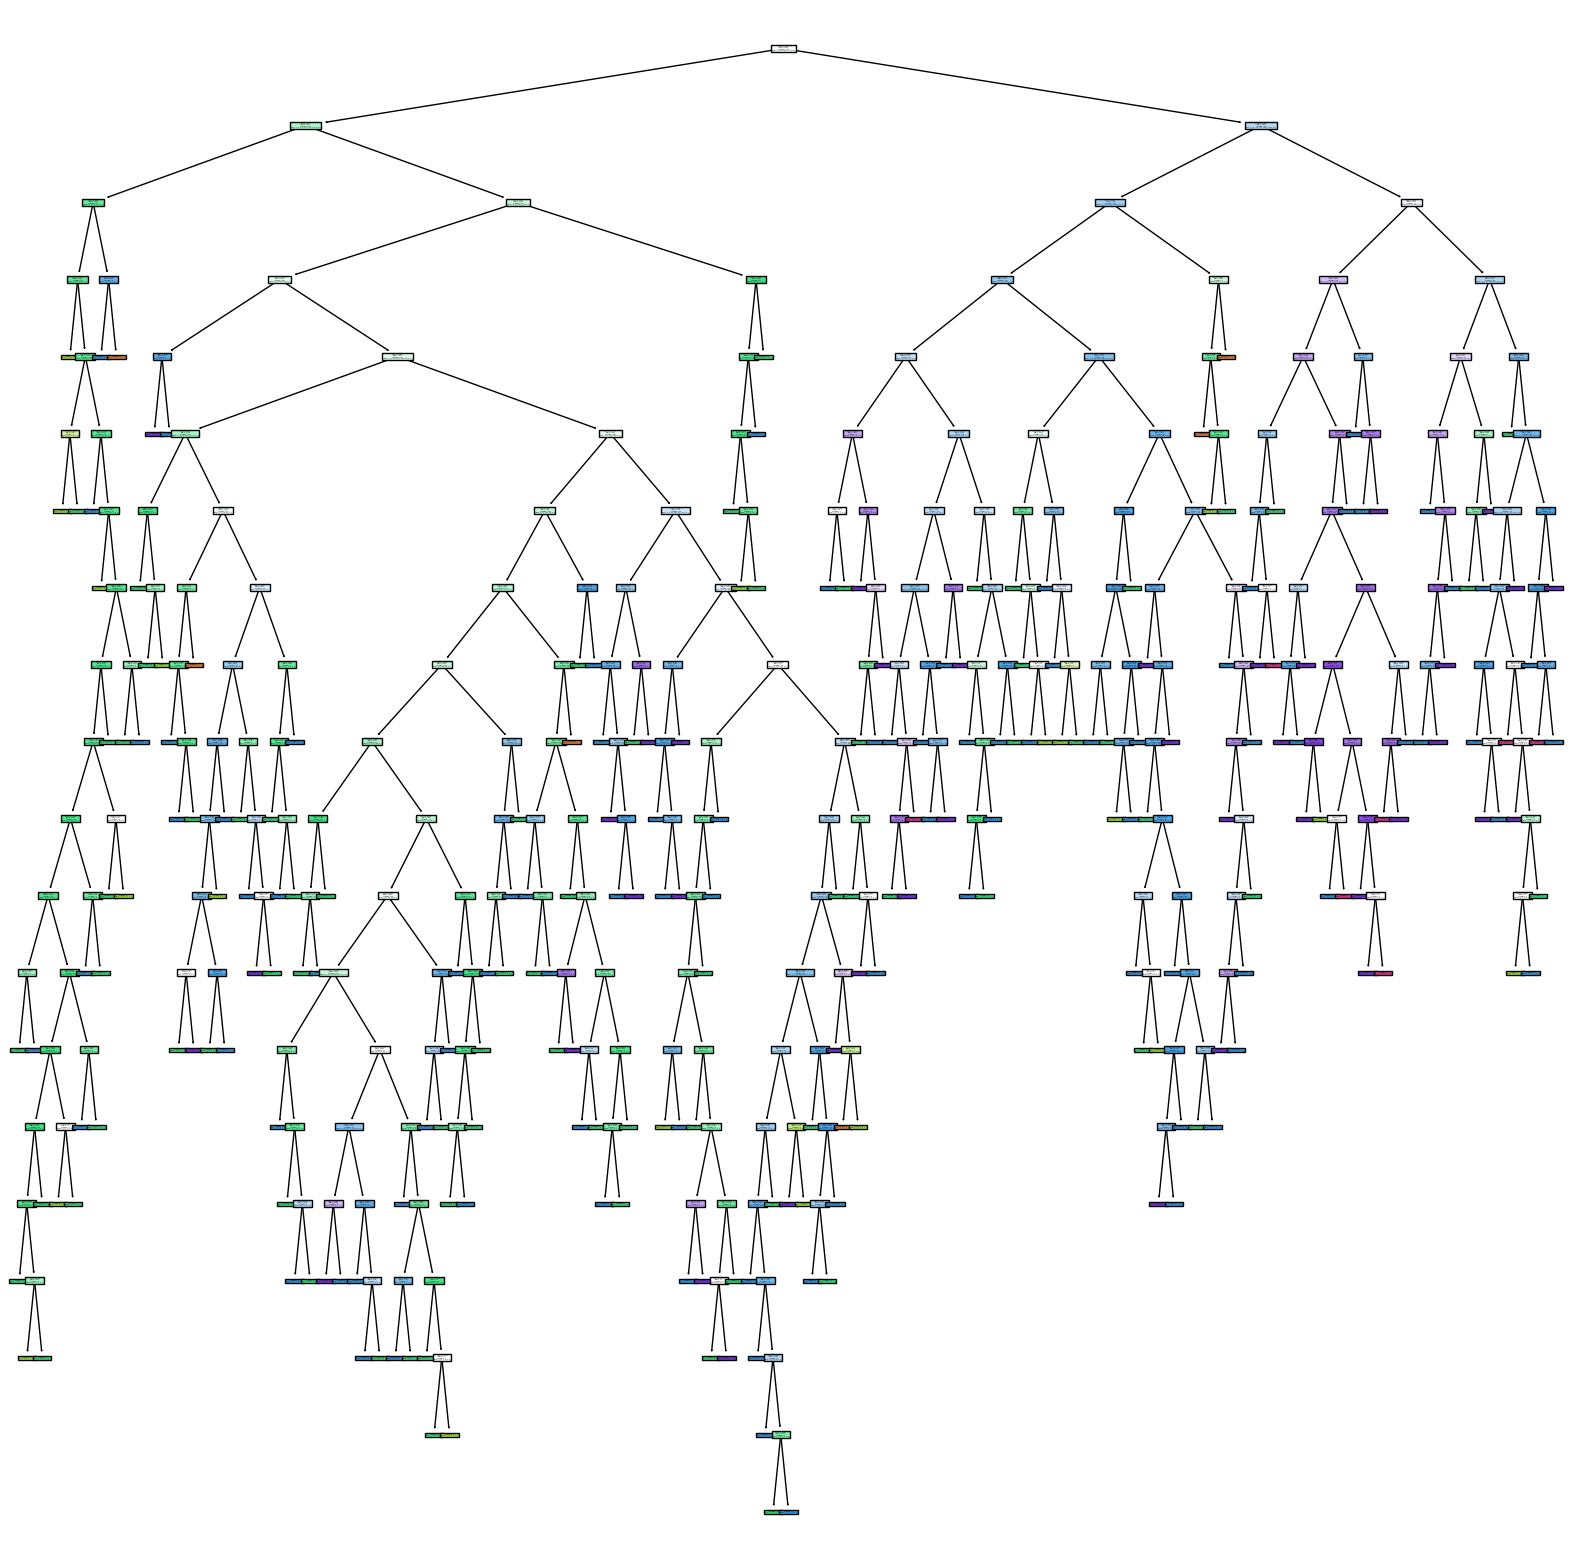

In [1080]:
plt.figure(figsize=(20,20))
for i in range(len(rf_model.estimators_)):
    tree.plot_tree(rf_model.estimators_[i], filled=True)

In [1081]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        17\n           5       0.69      0.77      0.73       195\n           6       0.62      0.66      0.64       200\n           7       0.60      0.44      0.51        61\n           8       0.00      0.00      0.00         6\n\n    accuracy                           0.65       480\n   macro avg       0.32      0.31      0.31       480\nweighted avg       0.61      0.65      0.63       480\n'

In [1082]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 151,  42,   2,   0],
       [  0,   0,  56, 132,  12,   0],
       [  0,   0,   1,  32,  27,   1],
       [  0,   0,   0,   2,   4,   0]], dtype=int64)

>>HyperParameter Tuning with grid search CV

In [1084]:
rf_tunned_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_tunned_model.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [1085]:
y_pred_tunned = rf_tunned_model.predict(X_test_std)
rf_accuracy_score_tuned = accuracy_score(y_test, y_pred_tunned)
rf_accuracy_score_tuned

0.5916666666666667

### Naive Bayes

In [1097]:
Naive_Bayes_model = GaussianNB()

In [1102]:
Naive_Bayes_model.fit(X_train_std, y_train)

GaussianNB()

In [1106]:
y_pred = Naive_Bayes_model.predict(X_test_std)
Naive_Bayes_accuracy_score = accuracy_score(y_test, y_pred)
Naive_Bayes_accuracy_score

0.5375

In [1107]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.06      0.06      0.06        17\n           5       0.66      0.66      0.66       195\n           6       0.52      0.50      0.51       200\n           7       0.39      0.48      0.43        61\n           8       0.00      0.00      0.00         6\n\n    accuracy                           0.54       480\n   macro avg       0.27      0.28      0.28       480\nweighted avg       0.54      0.54      0.54       480\n'

In [1108]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  2,   1,   9,   5,   0,   0],
       [  0,   6, 128,  56,   5,   0],
       [  0,  11,  52, 100,  35,   2],
       [  0,   0,   3,  29,  29,   0],
       [  0,   0,   0,   1,   5,   0]], dtype=int64)

In [1114]:
algorithms = {
    "linear_regression":(mean_MSE)*100*-1 ,
    "ridge_regression":(ridge_reg_score)*100*-1, 
    'lasso_regression':(lasso_regression_score)*100*-1 ,
    'logistic_regression':(logistic_regression_accuracy_score)*100, 
    'logistic_regression_train-test_split':(Logistic_accuracy_score2)*100, 
    'knn_classification_accuracy': (knn_classification_accuracy_score_mean)*100, 
    "knn_classification_all_N_values_accuracy_score":(knn_classification_all_N_values_accuracy_score_mean)*100,
    "Descion tree classification accuracy score": (dt_accuracy_score)*100,
    "SVC_rbf_accuracy_score":(SVC_classifier_rbf_accuracy_score)*100,
    "SVC_poly_accuracy_score": (SVC_classifier_poly_accuracy_score)*100,
    "rf_accuracy_score" : (rf_accuracy_score)*100,
    "rf_accuracy_score_tuned":(rf_accuracy_score_tuned)*100,
    "Naive_Bayes_accuracy_score":(Naive_Bayes_accuracy_score)*100
}

for key in (algorithms):
    print(f"{key}:\t\t {(algorithms[key])} %")

linear_regression:		 43.66293880315405 %
ridge_regression:		 43.58745778536775 %
lasso_regression:		 43.662911950553905 %
logistic_regression:		 56.041666666666664 %
logistic_regression_train-test_split:		 56.875 %
knn_classification_accuracy:		 98.81210691823901 %
knn_classification_all_N_values_accuracy_score:		 98.87460691823901 %
Descion tree classification accuracy score:		 51.66666666666667 %
SVC_rbf_accuracy_score:		 59.791666666666664 %
SVC_poly_accuracy_score:		 55.41666666666667 %
rf_accuracy_score:		 64.58333333333334 %
rf_accuracy_score_tuned:		 59.166666666666664 %
Naive_Bayes_accuracy_score:		 53.75 %


>Inference

The Random forest algorithm is found to be having the best accuracy score
further creating .pkl file of random forest, and testing with single input>>output and batch-input >>output

## Creating .pkl file

In [1129]:
pickle.dump(knn_model, open('KNN_classification_model.pkl', 'wb'))

In [1133]:
pickled_model = pickle.load(open('KNN_classification_Model.pkl', 'rb'))

### Batch Input

In [1137]:
pickled_model.predict(X_test)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [1138]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [1139]:
Feature_dict = {
    'fixed acidity':0,
'volatile acidity':1,
'citric acid':2,
'residual sugar':3,
'chlorides':4,
'free sulfur dioxide':5,
'total sulfur dioxide':6,
'density':7,
'pH':8,
'sulphates':9,
'alcohol':10
}

In [1140]:
Feature_dict.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [1141]:
list(Feature_dict.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Single Input/Output

In [1143]:
Feature_dict = {
    'fixed acidity':0,
'volatile acidity':1,
'citric acid':2,
'residual sugar':3,
'chlorides':4,
'free sulfur dioxide':5,
'total sulfur dioxide':6,
'density':7,
'pH':8,
'sulphates':9,
'alcohol':10
}

In [1144]:
list([Feature_dict.values()])

[dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

In [1145]:
pickled_model.predict([list(Feature_dict.values())])[0]

6

# CONCLUSION

Data Visualisation:

* From the qaulity =5,6 has the highest count in dataset and quality=3,4,7,8 least count in dataset , so the dataset was imbalanced.
* Volatile acidity feature is least correlated with quality however, alcohol and sulphates are highly correlated with quality. Hence, sample data with  least correlated feature when passed to pickled model should likely show less quality.
* Observed the min max values and found that the data is likely to have outliers, which will hamper the model training.

Model Training:

The accuracy score of models of KNN ML algortithm has the highest accuracy score =   98.81 %

This model helps in determining to the best vine quality at faster rate for huge data, than timetaking physiochemical laboratory tests.